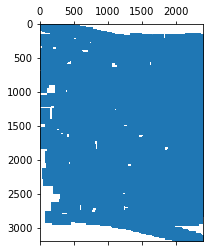

In [1]:
import scipy.io
import scipy.sparse
import matplotlib.pyplot as plt

Dt = scipy.io.mmread("DMatTrans_TCMAT.mtx");
D  = Dt.transpose();

fig, axs = plt.subplots(1, 1);
ax1 = axs;
ax1.spy(Dt);

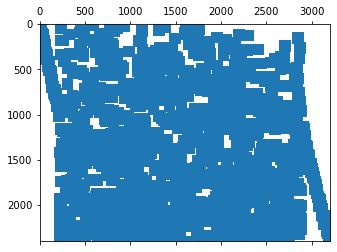

In [2]:
fig, axs = plt.subplots(1, 1);
ax1 = axs;
ax1.spy(D);

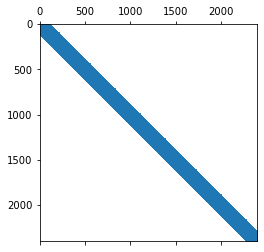

In [3]:
M = scipy.io.mmread("MobMat_TCMAT.mtx");

fig, axs = plt.subplots(1, 1);
ax1 = axs;
ax1.spy(M);

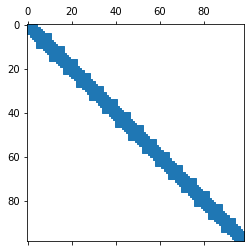

In [4]:
fig, axs = plt.subplots(1, 1);
ax1 = axs;
M1 = M.tocsr();
ax1.spy(M1[0:99,0:99]);

In [5]:
D1 = D.tocsr();
D1t = Dt.tocsr();

a = Dt*M*D;

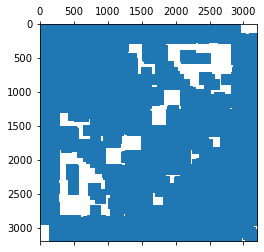

In [6]:
fig, axs = plt.subplots(1, 1);
ax1 = axs;
ax1.spy(a);

In [7]:
[m,n] = a.shape;
print("m = ", m, ", n = ", n);
import numpy as np
#b = np.random.rand()
b = np.random.rand(m,1);
print(b.shape)
G = -1.0*scipy.sparse.identity(m,format="coo");
h = np.zeros([m,1]);

m =  3202 , n =  3202
(3202, 1)


# Solve by cvxopt toolbox (interior point method)

In [8]:
from cvxopt import matrix, spmatrix, solvers
a_coo = a.tocoo()
P = spmatrix(a_coo.data.tolist(),a_coo.row.tolist(),a_coo.col.tolist(),size=a_coo.shape)
q = matrix(b,tc='d')
G1 = spmatrix(G.data.tolist(),G.row.tolist(),G.col.tolist(),size=G.shape)
h1 = matrix(h,tc='d')

sol = solvers.qp(P,q,G1,h1)

     pcost       dcost       gap    pres   dres
 0: -5.6222e+02  1.5565e+03  1e+04  1e+02  3e+00
 1:  5.1460e+02 -8.7551e+02  7e+03  6e+01  1e+00
 2:  8.8933e+02 -2.7663e+02  2e+03  7e+00  2e-01
 3:  1.9741e+02 -3.0545e+01  3e+02  8e-01  2e-02
 4:  4.0684e+01 -4.9262e+00  5e+01  3e-02  7e-04
 5:  8.8118e+00 -8.6336e-01  1e+01  3e-03  5e-05
 6:  1.8008e+00 -1.2501e-01  2e+00  2e-04  5e-06
 7:  2.6329e-01 -1.3737e-02  3e-01  2e-05  5e-07
 8:  2.6556e-02 -1.0977e-03  3e-02  2e-06  4e-08
 9:  1.2803e-03 -6.9170e-05  1e-03  6e-08  1e-09
10:  5.4919e-05 -5.1674e-06  6e-05  2e-09  3e-11
11:  2.3068e-06 -4.0976e-07  3e-06  3e-11  5e-13
12:  1.5838e-07 -2.7348e-08  2e-07  3e-13  6e-15
13:  1.1027e-08 -1.4402e-09  1e-08  3e-15  4e-16
Optimal solution found.


# Solve by scipy optimization methods

In [9]:
def quadfunc(x,A,b):
    xt = x.transpose()
    fx = 0.5*xt.dot(A.dot(x))+xt.dot(b)
    
    return fx[0]

In [10]:
from scipy.optimize import Bounds, minimize

ub = np.full(h.shape,np.Inf)
ub = np.resize(ub,m)
ul = np.resize(h,m)
bds = Bounds(ul,ub)
x0 = np.zeros([m,])

res = minimize(quadfunc,x0,args=(a,b),method='trust-constr',options={'verbose': 1}, bounds=bds)

`gtol` termination condition is satisfied.
Number of iterations: 52, function evaluations: 147338, CG iterations: 463, optimality: 8.28e-09, constraint violation: 0.00e+00, execution time: 2.9e+01 s.
